In [4]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
merged_tube = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/TUBE_merge_1.csv'),
                  index_col=0)
merged_pipe = pipe = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()), '../Data/Merged_data/PIPE_merge_1.csv'),
                  index_col=0)

In [75]:
'''
pca - fit PCA
data - data frame of original data
pc_i - int, first principal component to look at
pc_j- int, second principal component to look at
title - title for plot
'''
def biplot(pca, data, pc_i, pc_j,title):
    xvector = pca.components_[pc_i] 
    yvector = pca.components_[pc_j]
    
    xs = pca.transform(data)[:,pc_i] 
    ys = pca.transform(data)[:,pc_j]
    
    plt.figure(figsize=(10,10))
    for i in range(len(xvector)):
    # arrows project features (ie columns) as vectors onto PC axes
        plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
                  color='r', width=0.0005, head_width=0.0025)
        plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
                 list(data.columns.values)[i], color='r')
    for i in range(len(xs)):
    # circles project samples (ie rows  as points onto PC axes
        plt.plot(xs[i], ys[i], 'bo')
        plt.text(xs[i]*1.2, ys[i]*1.2, list(data.index)[i], color='b')
    plt.xlabel("PC"+str(pc_i+1))
    plt.ylabel("PC"+str(pc_j+1))
    plt.title(title)
    plt.show()

In [66]:
merged_tube = merged_tube.drop(columns=['Absorption_avg_500','Absorption_std_500','Absorption_avg_200','Absorption_std_200'])

In [67]:
scaler = StandardScaler()
scaled_tube = pd.DataFrame(scaler.fit_transform(merged_tube))
scaled_tube.columns = merged_tube.columns
scaled_tube.index = merged_tube.index

In [68]:
pca = PCA(n_components=0.9, svd_solver='full')
pca.fit(scaled_tube)


PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

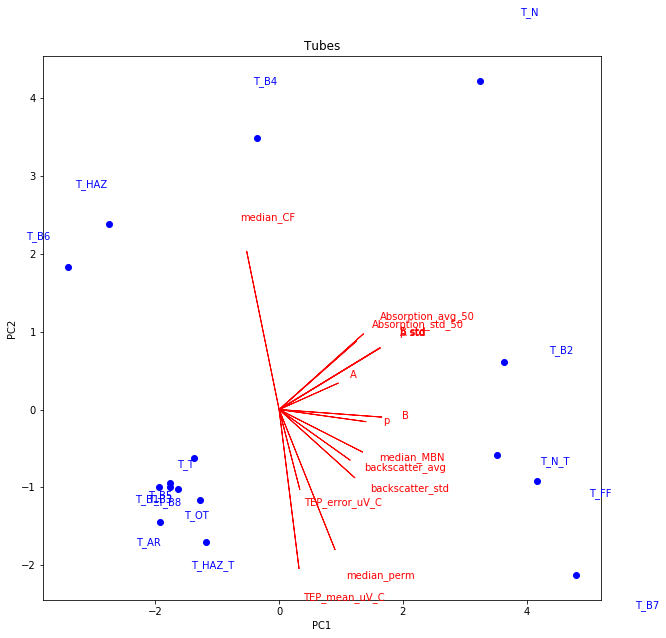

In [76]:
biplot(pca, scaled_tube, 0,1, "Tubes")

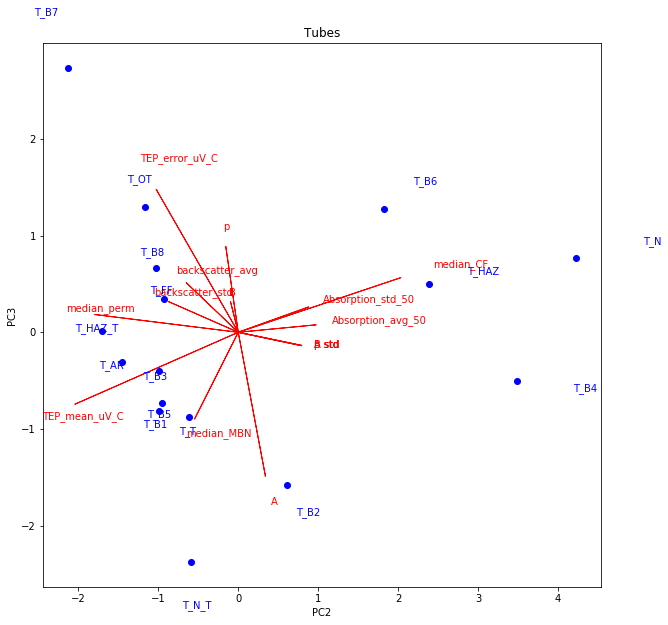

In [77]:
biplot(pca, scaled_tube, 1,2, "Tubes")

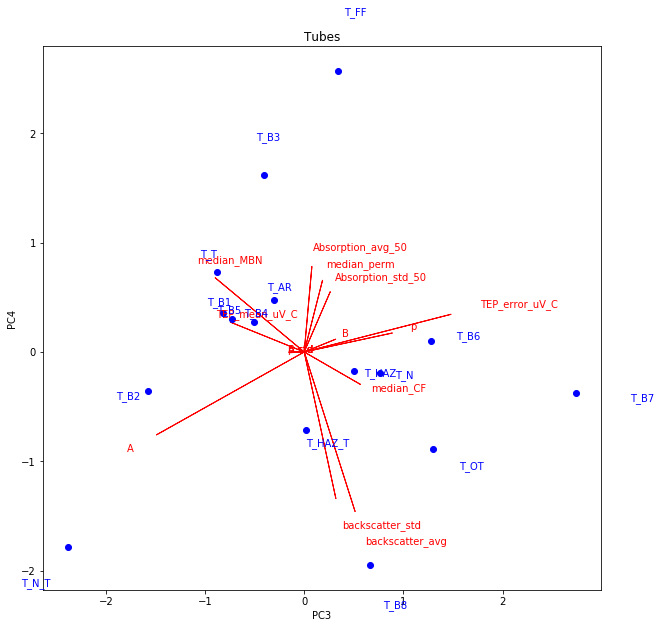

In [78]:
biplot(pca, scaled_tube, 2,3, "Tubes")

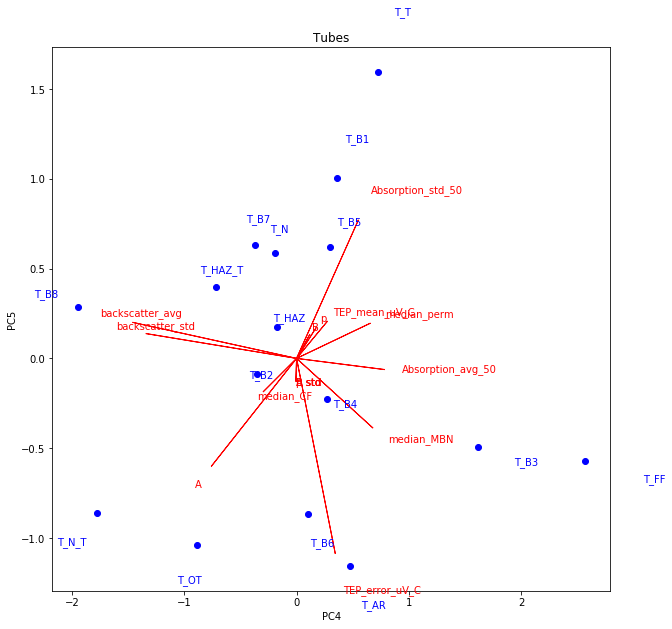

In [79]:
biplot(pca, scaled_tube, 3,4, "Tubes")